1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

%matplotlib inline

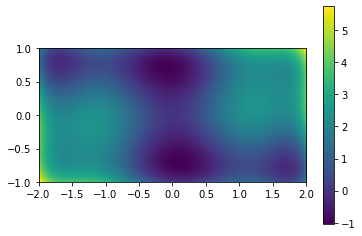

In [15]:
# Hints: Variables restricted to  −2<𝑥<2  and  −1<𝑦<1 . 
x = np.linspace(-2, 2,100)
y=np.linspace(-1, 1,100)

# 2D minimization of a six-hump camelback function

def f(x):
    return (4-2.1*(x[0]**2)+((x[0]**4)/3))*(x[0]**2)+x[0]*x[1]+(4*(x[1]**2)-4)*(x[1]**2)


X, Y = np.meshgrid(x, y)

plt.imshow(f([X, Y]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
plt.show()




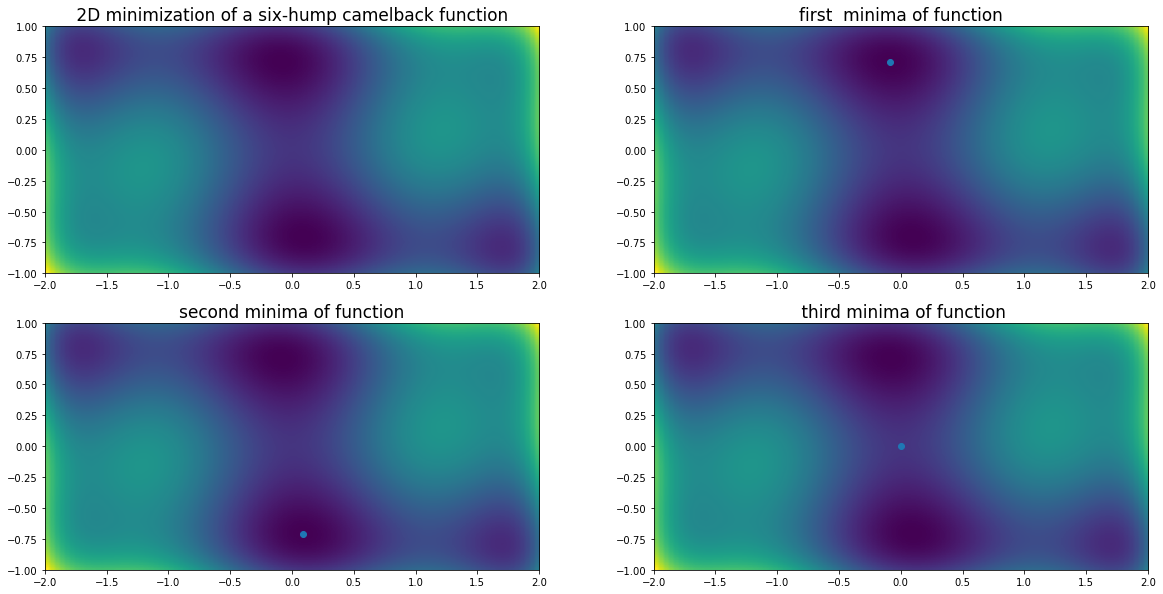

In [32]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
ax1.imshow(f([X, Y]), extent=[-2, 2, -1, 1], origin="lower")
ax1.set_title(' 2D minimization of a six-hump camelback function ', size=17)

x_min_first = optimize.minimize(f, x0=[0, 0.1])
ax2.imshow(f([X, Y]), extent=[-2, 2, -1, 1], origin="lower")
ax2.scatter(x_min_first .x[0], x_min_first .x[1])
ax2.set_title('first  minima of function', size=17)

x_min_second = optimize.minimize(f, x0=[0, -0.1])
ax3.imshow(f([X, Y]), extent=[-2, 2, -1, 1], origin="lower")
ax3.scatter(x_min_second .x[0], x_min_second .x[1])
ax3.set_title('second minima of function', size=17)

x_min_third = optimize.minimize(f, x0=[0, 0])
ax4.imshow(f([X, Y]), extent=[-2, 2, -1, 1], origin="lower")
ax4.scatter(x_min_third .x[0], x_min_third .x[1])
ax4.set_title(' third minima of function', size=17)

plt.show()

In [39]:
print('result of global minima of function at point x0=[0, 0.1]:','\n',x_min_first,'\n')  

result of global minima of function at point x0=[0, 0.1]: 
       fun: -1.0316284534898148
 hess_inv: array([[ 0.12908062, -0.00794293],
       [-0.00794293,  0.06166789]])
      jac: array([-2.98023224e-08, -1.31130219e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([-0.08984201,  0.71265632]) 



In [42]:
print('result of global minima of function at point x0=[0, -0.1]:','\n',x_min_second,'\n') 

result of global minima of function at point x0=[0, -0.1]: 
       fun: -1.0316284534898346
 hess_inv: array([[ 0.12908056, -0.00794288],
       [-0.00794288,  0.0616679 ]])
      jac: array([2.98023224e-08, 1.29640102e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([ 0.089842  , -0.71265633]) 



In [44]:
print('result of global minima of function at point x0=[0, 0]:','\n',x_min_third,'\n') 

result of global minima of function at point x0=[0, 0]: 
       fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.]) 



MY ANSWER:

as you can see from the points on the graphs and also the parameters which printed above, we an see the different global minima.

x_min_first : (-0.08984201,  0.71265632)

x_min_second : ( 0.089842  , -0.71265633)

x_min_third : (0., 0.)

I also plot the exact point (0,0),in this case we can underestand that algorithm choose this one as minima of the function But if we change a little this point the algorithm will chose other points as a minima so it would be true in this case.

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

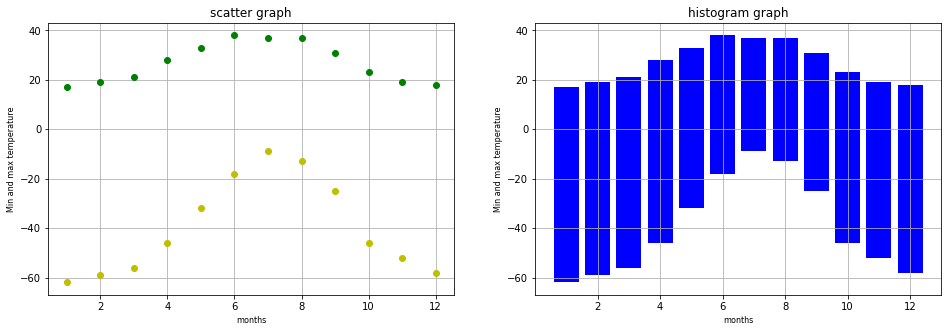

In [52]:
# Plot these temperatures

data_max=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
data_min=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months=np.linspace(1,12,12)


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

ax2.bar(months,data_max,color='b')
ax2.bar(months,data_min,color='b')
ax1.plot(months, data_max, 'go')
ax1.plot(months, data_min, 'yo')
 
ax2.set_xlabel('months',size=8)
ax2.set_ylabel('Min and max temperature',size=8)
ax2.set_title('histogram graph', size=12) 
ax2.grid()

ax1.set_xlabel('months',size=8)
ax1.set_ylabel('Min and max temperature',size=8)
ax1.set_title('scatter graph', size=12) 
ax1.grid()
 


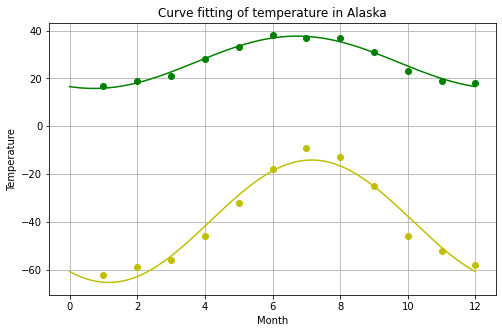

In [49]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,data_max, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temps, months,data_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

 
plt.figure(figsize=(8, 5)) 
plt.plot(months, data_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'g-')
plt.plot(months, data_min, 'yo')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature' )
plt.title('Curve fitting of temperature in Alaska')
plt.grid()
plt.show()



3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [53]:
# Read the data/residuals_261.pkl file

import pandas as pd
data_residuals=pd.read_pickle("residuals_261.pkl")
print(data_residuals)     

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


Text(0.5, 1.0, 'histogram of residual ')

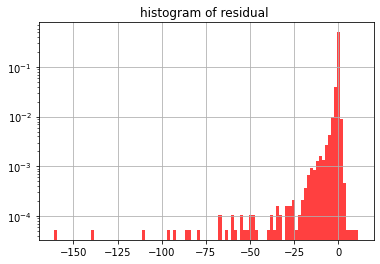

In [55]:
# create an histogram 

a=data_residuals.tolist()
n, bins, patches = plt.hist(a['residuals'],100,density=True, facecolor='r', alpha=0.75)
 
plt.yscale('log')
plt.grid()
plt.title('histogram of residual ') 

parameters:
 [0.04423782]
covariance matrix:
 [[7.52446367e-05]]


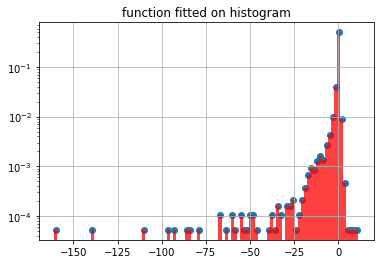

In [49]:
#By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals

n, bins, patches = plt.hist(a['residuals'], 100,density=True, facecolor='r', alpha=0.75)
x=(bins[1:]+bins[:-1])/2
y=[]
for i in range(len(n)):
    y.append(n[i])
plt.scatter(x,y)
plt.yscale('log')
plt.grid()
plt.title('function fitted on histogram') 
def f(x,c):
    return np.exp(x*c)

y=np.asarray(y)
popt, pcov= optimize.curve_fit(f,x,y)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

2008.00548
(1459,)
(1459,)


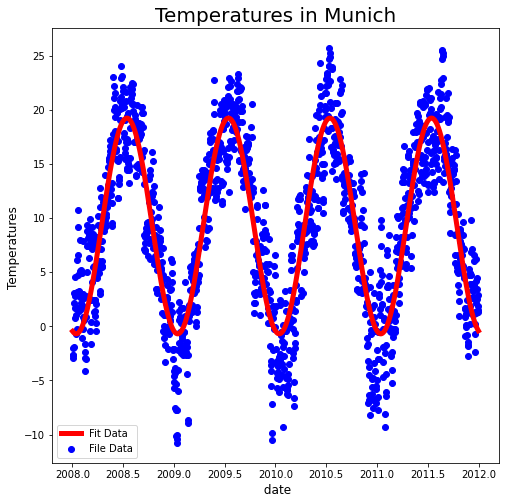

In [66]:
date, temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)

keep = np.abs(temperature) < 90
date = date[keep]
temperature = temperature[keep]

keep=date>2008
date =np.array(date[keep])
temperature = np.array(temperature[keep])
keep=date<2012
date =np.array(date[keep])
temperature = np.array(temperature[keep])
print(date[1])
print(date.shape)
print(temperature.shape)

def f(x, A,b,c):
    return A * np.cos((2*np.pi * x) +b)+c

popt, pcov = optimize.curve_fit(f, date, temperature)

plt.figure(figsize=(8, 8))
plt.scatter(date, temperature, color = 'b', label = 'File Data')
plt.plot(date,f(date,*popt),'r',linewidth=5,label = 'Fit Data')
plt.xlabel(' date', fontsize = 12)
plt.ylabel('Temperatures ', fontsize = 12)  
plt.title('Temperatures in Munich', fontsize = 20)
plt.legend()
plt.show()

In [67]:
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("f = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))

parameters:
 [-9.96203467 12.33174286  9.26282131]
covariance matrix:
 [[ 1.75558202e-02  9.86007919e-07 -2.76510342e-06]
 [ 9.86007919e-07  1.77329886e-04  5.40552783e-08]
 [-2.76510342e-06  5.40552783e-08  8.78853325e-03]]
A = -9.96 +- 0.13
f = 12.33 +- 0.01


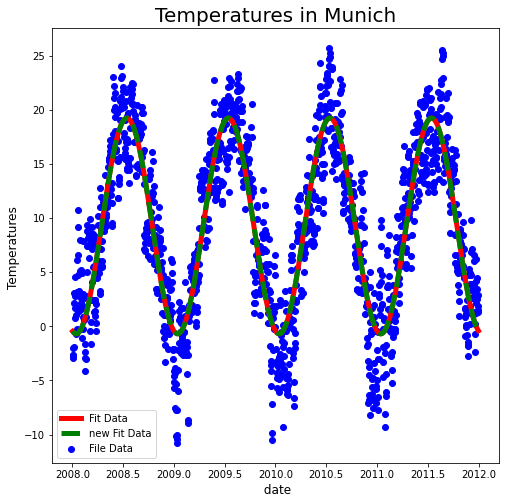

In [74]:
def g(x,A,b,c,d):
    return A * np.cos((2*np.pi*b * x) +c)+d
poptt, pcovv = optimize.curve_fit(g, date, temperature)
plt.figure(figsize=(8, 8))
plt.scatter(date, temperature, color = 'b', label = 'File Data')
plt.plot(date,f(date,*popt),'r',linewidth=5,label = 'Fit Data')
plt.plot(date,g(date,*poptt),'g--',linewidth=5,label = 'new Fit Data')
plt.xlabel(' date', fontsize = 12)
plt.ylabel('Temperatures ', fontsize = 12)  
plt.title('Temperatures in Munich', fontsize = 20)
plt.legend()
plt.show()


In [71]:
print("parameters:\n", poptt)
print("covariance matrix:\n", pcovv)

parameters:
 [-9.96072859  1.0002935   8.62499018  9.26567493]
covariance matrix:
 [[ 1.77591210e-02 -2.63813842e-05  3.33181890e-01 -2.64232662e-04]
 [-2.63813841e-05  3.54898189e-06 -4.48214590e-02  3.44906541e-05]
 [ 3.33181890e-01 -4.48214590e-02  5.66067644e+02 -4.35595578e-01]
 [-2.64232661e-04  3.44906541e-05 -4.35595578e-01  9.12963640e-03]]


MY ANSWER:

we plot both fitting functions on the data of Temperatures in Munich. as we can see from the last plot, both function f and g works same, so as the result we can decided that b is not affected the fitting of the data.  

In [80]:
print('overal avg:',np.mean(temperature))

overal avg: 9.261252084167237


In [83]:
ssr = np.sum((temperature-(f(date,*popt)))**2)
tss = np.sum((np.mean(temperature) - temperature)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(date,temperature))

R2 = 0.7951877426878504 
R = 0.8917329996629318
Covariance matrix:
 [[1.         0.02804313]
 [0.02804313 1.        ]]


In [84]:
ssr = np.sum((temperature-(g(date,*poptt)))**2)
tss = np.sum((np.mean(temperature) - temperature)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(date,temperature))

R2 = 0.7951909237079657 
R = 0.8917347832780583
Covariance matrix:
 [[1.         0.02804313]
 [0.02804313 1.        ]]


SSR: 88436.18577922122 106662.32545254132
Test Linear vs Quadratic:
CL: 1.000 , additional parameter necessary: NO


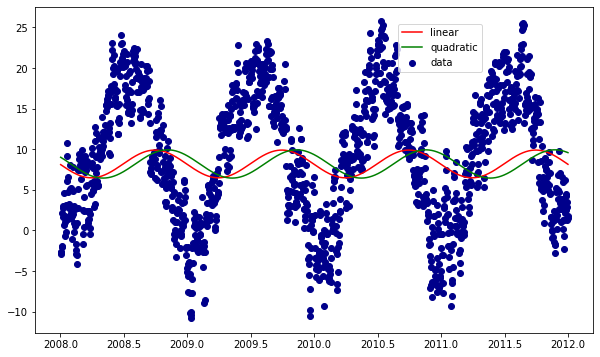

In [79]:
# define function for F-test
from scipy import stats
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


# generate data according to a certain distribution + random noise
N = 100
x = np.linspace(0, 5., N)
rnd = np.random.normal(size=(N))
y = x**2 + rnd

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(x=date, y=temperature, marker='o', c='darkblue', label="data")
 

pop1, cov1 = optimize.curve_fit(f, x, y)
y1 = f(date,*pop1)
ax.plot(date, y1, color='r', label="linear")
ssr_1 = np.sum((y1 - temperature)**2)
ndof_1 = 2 - 1 # n of parameters - 1

pop2, cov2 = optimize.curve_fit(g, x, y)
y2 = g(date,*pop2)
ax.plot(date, y2, color='g', label="quadratic")
ssr_2 = np.sum((y2 - temperature)**2)
ndof_2 = 3 - 1 # n of parameters - 1


ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_1, ssr_2)

# run F-test
# test f2 vs f1
print("Test Linear vs Quadratic:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, N, verbose=True)
